(haldane-fin-nb)=
# Finite Haldane model DOS

The density of states (DOS) for the finite Haldane model can be calculated using the eigenvalues obtained from the diagonalization of the Hamiltonian. The DOS is a measure of the number of available states at each energy level and can provide insights into the electronic properties of the system.

In [1]:
from pythtb.tb_model import TBModel 
import numpy as np
import matplotlib.pyplot as plt

For ease of use, we will import the Haldane model from the `pythtb.models` library.

:::{versionadded} 2.0.0
:::

In [2]:
from pythtb.models import haldane

In [3]:
delta = 0.0
t = -1.0
t2 = 0.15 

my_model = haldane(delta, t, t2)
print(my_model)

----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 2
k-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 2
number of electronic states = 2

Lattice vectors (Cartesian):
  # 0 ===> [ 1.000 ,    0   ]
  # 1 ===> [ 0.500 ,  0.866 ]
Orbital vectors (dimensionless):
  # 0 ===> [ 0.333 ,  0.333 ]
  # 1 ===> [ 0.667 ,  0.667 ]
Site energies:
  # 0 ===> -0.000 
  # 1 ===>  0.000 
Hoppings:
  < 0 | H | 1 + [ 0.0 ,  0.0 ] >  ===> -1.0000
  < 0 | H | 1 + [-1.0 ,  0.0 ] >  ===> -1.0000
  < 0 | H | 1 + [ 0.0 , -1.0 ] >  ===> -1.0000
  < 0 | H | 0 + [ 1.0 ,  0.0 ] >  ===> 0.0000+0.1500j
  < 1 | H | 1 + [ 1.0 ,  0.0 ] >  ===> 0.0000-0.1500j
  < 0 | H | 0 + [-1.0 ,  1.0 ] >  ===> 0.0000+0.1500j
  < 1 | H | 1 + [-1.0 ,  1.0 ] >  ===> 0.0000-0.1500j
  < 0 | H | 0 + [ 0.0 , -1.0 ] >  ===> 0.0000+0.1500j
  < 1 | H | 1 + [ 0.0 ,

In [4]:
# cutout finite model first along direction x with no PBC
tmp_model = my_model.cut_piece(20, 0, glue_edgs=False)
# cutout also along y direction with no PBC
fin_model_false = tmp_model.cut_piece(20, 1, glue_edgs=False)

# cutout finite model first along direction x with PBC
tmp_model = my_model.cut_piece(20, 0, glue_edgs=True)
# cutout also along y direction
fin_model_true = tmp_model.cut_piece(20, 1, glue_edgs=True)

In [5]:
# solve models
evals_false = fin_model_false.solve_ham()
evals_true = fin_model_true.solve_ham()

Text(0, 0.5, 'Number of states')

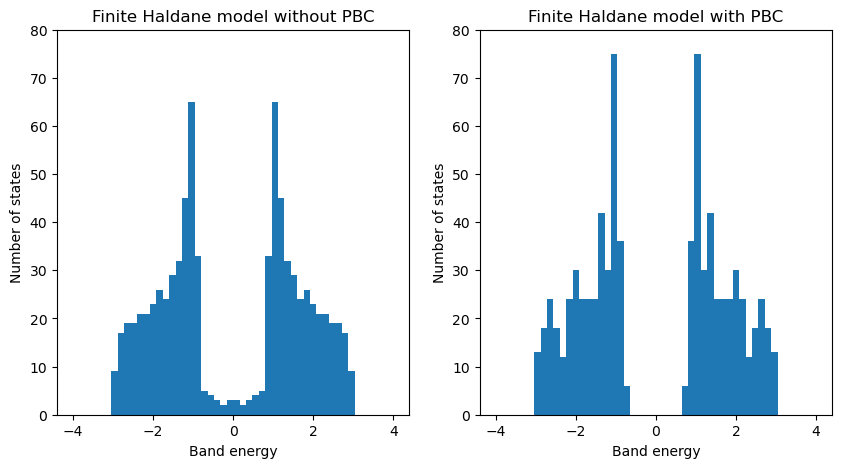

In [6]:
# flatten eigenvalue arrays
evals_false = evals_false.flatten()
evals_true = evals_true.flatten()

# now plot density of states
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(evals_false, 50, range=(-4.0, 4.0))
ax[0].set_ylim(0.0, 80.0)
ax[0].set_title("Finite Haldane model without PBC")
ax[0].set_xlabel("Band energy")
ax[0].set_ylabel("Number of states")

ax[1].hist(evals_true, 50, range=(-4.0, 4.0))
ax[1].set_ylim(0.0, 80.0)
ax[1].set_title("Finite Haldane model with PBC")
ax[1].set_xlabel("Band energy")
ax[1].set_ylabel("Number of states")